## ICE-9 Spatial Filters
Please note that all the tasks and questions are extensions of the course's PPTs

## Task 1. Gaussian filters
Given the Gaussian mask creation formula: h(x,y) = exp(- (x.^2+y.^2) / (2*sigma^2)). Please create 3 by 3, 5 by 5, and 7 by 7 Gaussian masks and display the masks' matrices (assume sigma = 1). Apply these Gaussian filters to one image separately, and display the outputs. (DO NOT use any of the existing implementations for Gaussian  masks creation)

In [1]:
import cv2
import math
import numpy as np
def gaussian(a):
    sum=0
    mid=int(a/2)
    h = np.empty((a,a), float)
    for i in range(0,a):
        for j in range(0,a):
            h[i][j]= math.exp(-(((pow((abs(i-mid)),2)+pow(abs(j-mid),2))/8)))
    h=h/(np.sum(h))
    return h

[[0.10186806 0.11543164 0.10186806]
 [0.11543164 0.13080118 0.11543164]
 [0.10186806 0.11543164 0.10186806]]
[[0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.03832756 0.05576627 0.06319146 0.05576627 0.03832756]
 [0.03382395 0.04921356 0.05576627 0.04921356 0.03382395]
 [0.02324684 0.03382395 0.03832756 0.03382395 0.02324684]]
[[0.00492233 0.00919613 0.01338028 0.01516185 0.01338028 0.00919613
  0.00492233]
 [0.00919613 0.01718062 0.02499766 0.02832606 0.02499766 0.01718062
  0.00919613]
 [0.01338028 0.02499766 0.03637138 0.04121417 0.03637138 0.02499766
  0.01338028]
 [0.01516185 0.02832606 0.04121417 0.04670178 0.04121417 0.02832606
  0.01516185]
 [0.01338028 0.02499766 0.03637138 0.04121417 0.03637138 0.02499766
  0.01338028]
 [0.00919613 0.01718062 0.02499766 0.02832606 0.02499766 0.01718062
  0.00919613]
 [0.00492233 0.00919613 0.01338028 0.01516185 0.01338028 0.00919613
  0.00492233]]


(-0.5, 479.5, 359.5, -0.5)

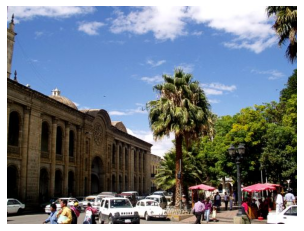

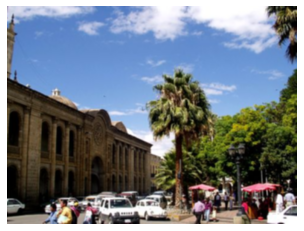

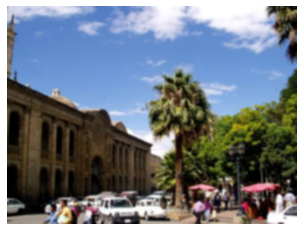

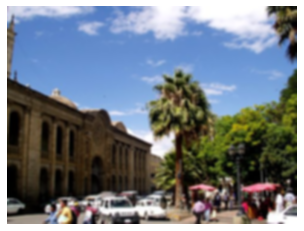

In [2]:
import matplotlib.pyplot as plt
img=cv2.imread(r"C:\Users\Anand Gupta\Downloads\images\2.jpg")
plt.figure()
plt.imshow(img[:,:,::-1])
plt.axis("off")
g3=gaussian(3)
print(g3)
img3=cv2.filter2D(img,-1,g3)
plt.figure()
plt.imshow(img3[:,:,::-1])
plt.axis("off")
g5=gaussian(5)
print(g5)
img5=cv2.filter2D(img,-1,g5)
plt.figure()
plt.imshow(img5[:,:,::-1])
plt.axis("off")
g7=gaussian(7)
print(g7)
img7=cv2.filter2D(img,-1,g7)
plt.figure()
plt.imshow(img7[:,:,::-1])
plt.axis("off")

## Question 1. According to the filters you have learnt, which is the best one to remove the salt and pepper noise? Explain it.

**Answer to Q1**: type your answer here


**Median filter is best to remove salt and pepper noise, this is a non-linear filter.This doesnot reduce the sharpness of the image.The general filter blurs the image and noised pixel will be blurred and adjacent values are adjusted to reduce the noise this reduces the quality of the image.Whereas, in median filter it doesn't effect the adjust cells.**

---

## Task 2. Sharpening Filters
2.1 We know a sharp image can be obtained by by subtracting a smoothed (i.e low-passed) image from the original image. Please get a sharp image with the 7 by 7 Gaussian smoothing filter you built in task 1 and display the output.

(-0.5, 479.5, 359.5, -0.5)

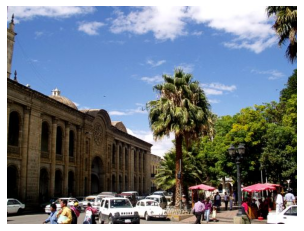

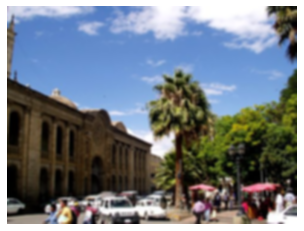

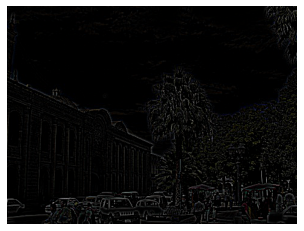

In [3]:
#write you code here
import matplotlib.pyplot as plt
img=cv2.imread(r"C:\Users\Anand Gupta\Downloads\images\2.jpg")
plt.figure()
plt.imshow(img[:,:,::-1])
plt.axis("off")
plt.figure()
plt.imshow(img7[:,:,::-1])
plt.axis("off")
hb=cv2.subtract(img,img7)
plt.figure()
plt.imshow(hb[:,:,::-1])
plt.axis("off")

2.2 Using the sharp image produced in task 2.1, please apply the unsharp masking and high boost filtering (k = 3) separately, and display the sharpening results.

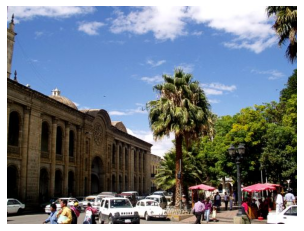

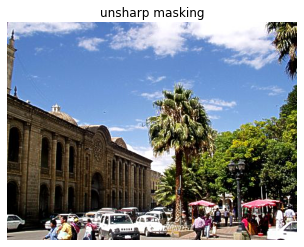

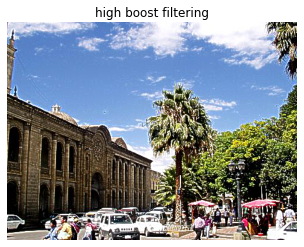

In [4]:
#write your code here
plt.figure()
plt.axis("off")
plt.imshow(img[:,:,::-1])
unsharp_image = cv2.addWeighted(img,1,hb,1,0)
plt.figure()
plt.title("unsharp masking")
plt.axis("off")
plt.imshow(unsharp_image[:,:,::-1])
unsharp_image = cv2.addWeighted(img,1, hb,3, 0)
plt.figure()
plt.title("high boost filtering")
plt.axis("off")
plt.imshow(unsharp_image[:,:,::-1])

## Question 2.1 Please give an example of 3 by 3 unsharp masking filter.
For instance, an example of sobel mask filter is: [[-1, -2, -1],[0, 0, 0],[1, 2, 1]].

**Answer to Q2.1**: type your answer here
Prewitt filter- [[1, 1, 1][0, 0, 0][-1, -1, -1]]

## Question 2.2 Explain the difference between sharpening filter (high-pass) and unsharp masking filter
Given a 3 by 3 sharpening filter as [[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]].

**Answer to Q2.2**: type your answer here

Sharpening filter does the same thing as unsharp masking but the effects of them vary.Sharpening filter cann't do fine sharping wheras unsharp masking does that.Unmasking also performs edge sharpening.

---